# Main step


1.   Import the dataset 

> From the output result, there are 506 instances data in the dataset, every data has 13 features and 1 target. There is no missing attribute value.



2.   Split the boston dataset into taining and test sets


> Use the `train_test_split` to split the daraset into train and test datasets. Because I would like to use the data structure tensor to deal with the dataset. Firstly, tansform the data to DataFrame,and then tranform to tensor.

3. Create dataset and dataloader
4. Implement linear regression model
5. Implement the gradient descent optimizer
6. Identify the most highly correlated feature variables with the target variable
by analyzing the results.

> Use the heatmap function from seaborn to plot the correlation matrix.
From the coorelation plot we can see that PRICE is strongly correlated to LSTAT, RM








In [0]:
import numpy as np
import pandas as pd
import torch
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
from torch.utils.data import Dataset, TensorDataset, DataLoader
from sklearn.model_selection import train_test_split


In [0]:
#Import the dataset 

from sklearn.datasets import load_boston
boston = load_boston()
print(type(boston))

print(boston.keys())
print(boston.DESCR)


<class 'sklearn.utils.Bunch'>
dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to

In [0]:
# Let's change the data to a Panda's Dataframe
import pandas as pd
boston_df = pd.DataFrame(boston['data'] )
boston_df.head()# Let's change the data to a Panda's Dataframe

#Now add the column names.
boston_df.columns = boston['feature_names']
boston_df.head()

#Add the target as PRICE. 
boston_df['PRICE']= boston['target']
boston_df.head()

CRIM    ZN  INDUS  CHAS    NOX  ...    TAX  PTRATIO       B  LSTAT  PRICE
0  0.00632  18.0   2.31   0.0  0.538  ...  296.0     15.3  396.90   4.98   24.0
1  0.02731   0.0   7.07   0.0  0.469  ...  242.0     17.8  396.90   9.14   21.6
2  0.02729   0.0   7.07   0.0  0.469  ...  242.0     17.8  392.83   4.03   34.7
3  0.03237   0.0   2.18   0.0  0.458  ...  222.0     18.7  394.63   2.94   33.4
4  0.06905   0.0   2.18   0.0  0.458  ...  222.0     18.7  396.90   5.33   36.2

[5 rows x 14 columns]

In [0]:
#Split the boston dataset into taining and test sets

from torch.utils.data.dataset import random_split

y = boston_df['PRICE']
X = boston_df.iloc[:,0:13]
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size = 0.2,random_state = 1)
print(type(X_train))
#Train_data = pd.concat([pd.DataFrame(X_train),pd.DataFrame(Y_train)],axis=1,ignore_index=True)
#Test_data = pd.concat([pd.DataFrame(X_test),pd.DataFrame(Y_test)],axis=1, ignore_index=True)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)


<class 'pandas.core.frame.DataFrame'>
(404, 13) (102, 13) (404,) (102,)


In [0]:
#Transform to numpy array
Xtraindata_nparray = np.array(X_train.values)
Ytraindata_nparray = np.array(Y_train.values)
Xtestdata_nparray = np.array(X_test.values)
Ytestdata_nparray = np.array(Y_test.values)

#Transform to tensor 
Xtraindata_tensor = torch.tensor(Xtraindata_nparray) 
Ytraindata_tensor = torch.tensor(Ytraindata_nparray)
Xtestdata_tensor = torch.tensor(Xtestdata_nparray) 
Ytestdata_tensor = torch.tensor(Ytestdata_nparray)

print(Xtraindata_tensor)
print(Ytraindata_tensor)

tensor([[1.4150e-01, 0.0000e+00, 6.9100e+00,  ..., 1.7900e+01, 3.8337e+02,
         5.8100e+00],
        [1.5445e-01, 2.5000e+01, 5.1300e+00,  ..., 1.9700e+01, 3.9068e+02,
         6.8600e+00],
        [1.6812e+01, 0.0000e+00, 1.8100e+01,  ..., 2.0200e+01, 3.9690e+02,
         3.0810e+01],
        ...,
        [5.8720e+00, 0.0000e+00, 1.8100e+01,  ..., 2.0200e+01, 3.9690e+02,
         1.9370e+01],
        [3.3045e-01, 0.0000e+00, 6.2000e+00,  ..., 1.7400e+01, 3.7675e+02,
         1.0880e+01],
        [8.0140e-02, 0.0000e+00, 5.9600e+00,  ..., 1.9200e+01, 3.9690e+02,
         8.7700e+00]], dtype=torch.float64)
tensor([25.3000, 23.3000,  7.2000, 21.2000, 11.7000, 27.0000, 29.6000, 26.5000,
        43.5000, 23.6000, 11.0000, 33.4000, 36.0000, 36.4000, 19.0000, 20.2000,
        34.9000, 50.0000, 19.3000, 14.9000, 26.6000, 19.9000, 24.8000, 21.2000,
        23.9000, 20.6000, 23.1000, 28.0000, 20.0000, 23.1000, 25.0000,  9.7000,
        23.9000, 36.1000, 13.4000, 12.7000, 39.8000, 10.4000, 2

In [0]:
#Implement dataloader
# 要两个loader,一个给train，一个给test
class TrainDataset(Dataset):
    """ Train dataset."""
    def __init__(self):
        self.len = Xtraindata_tensor.shape[0]
        self.x_traindata = Xtraindata_tensor
        self.y_traindata = Ytraindata_tensor

    def __getitem__(self, index):
        return self.x_traindata[index], self.y_traindata[index]

    def __len__(self):
        return self.len
      
class TestDataset(Dataset):
    """ Test dataset."""
    def __init__(self):
        self.len = Xtestdata_tensor.shape[0]
        self.x_testdata = Xtestdata_tensor
        self.y_testdata = Ytestdata_tensor

    def __getitem__(self, index):
        return self.x_testdata[index], self.y_testdata[index]

    def __len__(self):
        return self.len

traindataset = TrainDataset()
testdataset = TestDataset()
train_loader = DataLoader(traindataset, batch_size=101, shuffle=True)
test_loader = DataLoader(testdataset, batch_size=101, shuffle=True)
#test_loader = DataLoader(Testdata_tensor, batch_size=20, shuffle=True)

print(traindataset)


In [0]:
batch_size = 50
num_epochs = 40
size_hidden= 20
n_output=1
colsTrain=X_train.shape[1]
colsTest=X_test.shape[1]


#Create the model RegressionModel
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# Assume that we are on a CUDA machine, then this should print a CUDA device:
print("Executing the model on :",device)
class Net(torch.nn.Module):
    def __init__(self, n_feature, size_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(13, size_hidden)   # hidden layer
        self.predict = torch.nn.Linear(size_hidden, n_output)   # output layer

    def forward(self, x):
        x = F.relu(self.hidden(x))      # activation function for hidden layer
        x = self.predict(x)             # linear output
        return x

net = Net(13, size_hidden, n_output)    

Executing the model on : cpu


In [0]:
#Adam is a specific flavor of gradient decent which is typically better
optimizer = torch.optim.Adam(net.parameters(), lr=0.01)
#optimizer = torch.optim.SGD(net.parameters(), lr=0.2)
criterion = torch.nn.MSELoss(size_average=False)

/usr/local/lib/python3.6/dist-packages/torch/nn/_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


In [0]:
from sklearn.utils import shuffle
from torch.autograd import Variable
running_loss = 0.0
for epoch in range(5):
    for ix, (Xb, yb) in enumerate(traindataset):
        inputs = Variable(Xb).float()
        labels = Variable(yb).float()
        
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        #print("outputs",outputs)
        #print("outputs",outputs,outputs.shape,"labels",labels, labels.shape)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        
    print('Epoch {}'.format(epoch+1), "loss: ",running_loss)
    running_loss = 0.0

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:431: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 1 loss:  40084.64670545666
Epoch 2 loss:  25172.872184543987
Epoch 3 loss:  21696.3494849219
Epoch 4 loss:  20204.40075246105
Epoch 5 loss:  18527.49634138176
Epoch 6 loss:  17625.548891362036
Epoch 7 loss:  17021.393143632158
Epoch 8 loss:  16944.80290537791
Epoch 9 loss:  16697.585588393966
Epoch 10 loss:  16383.614930263619
Epoch 11 loss:  16080.898261777998
Epoch 12 loss:  15974.081879401638
Epoch 13 loss:  16022.294782161713
Epoch 14 loss:  15743.472965883208
Epoch 15 loss:  15279.702463655736
Epoch 16 loss:  14551.106891118223
Epoch 17 loss:  14457.992976470574
Epoch 18 loss:  14361.766552148154
Epoch 19 loss:  14682.849332042664
Epoch 20 loss:  14434.859884351084
Epoch 21 loss:  14188.80293991603
Epoch 22 loss:  13876.657389113505
Epoch 23 loss:  13728.756375810677
Epoch 24 loss:  13593.675167901325
Epoch 25 loss:  13502.400902839341
Epoch 26 loss:  13336.312509149458
Epoch 27 loss:  13224.618898658562
Epoch 28 loss:  13141.021935415469
Epoch 29 loss:  13032.225961253745
E

In [0]:
import pandas as pd
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
#This is a little bit tricky to get the resulting prediction.  
def calculate_mse(x,y=[]):
    """
    This function will return the r2 if passed x and y or return predictions if just passed x. 
    """
    # Evaluate the model with the test set. 
    X = Variable(torch.FloatTensor(x))  
    print(type(X))
    result = net(X) #This outputs the value for regression
    result=result.data[:,0].numpy()
    print(type(result))
  
    if len(y) != 0:
        mse=(np.sqrt(mean_squared_error(result, y)))
        print("mean squared error", mse)
        #print('Accuracy {:.2f}'.format(num_right / len(y)), "for a total of ", len(y), "records")
        return pd.DataFrame(data= {'actual': y, 'predicted': result})
    else:
        print("returning predictions")
        return result

In [25]:
result1=calculate_mse(Xtraindata_nparray,Ytraindata_nparray)
result2=calculate_mse(Xtestdata_nparray,Ytestdata_nparray)

<class 'torch.Tensor'>
<class 'numpy.ndarray'>
mean squared error 4.68901806466259
<class 'torch.Tensor'>
<class 'numpy.ndarray'>
mean squared error 4.756234259056361


In [0]:
# compute the pair wise correlation for all columns  
correlation_matrix = boston_df.corr().round(2)

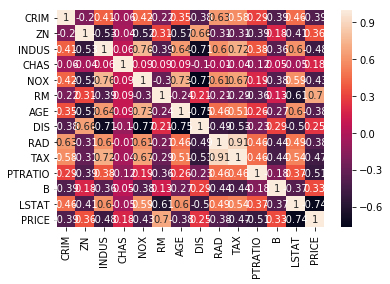

In [0]:
# use the heatmap function from seaborn to plot the correlation matrix
# annot = True to print the values inside the square
import seaborn as sns 
sns.heatmap(data=correlation_matrix, annot=True)